In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import sent_tokenize, word_tokenize

# Loading & preprocessing the data

In [2]:
df = pd.read_csv('Fifa_WC22_cleaned.csv')
df

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,Time,WeekDay,Month,Date,Hour,Tweet_cleaned
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral,23:59:21,Sun,11,2022-11-20,23,drinking today TucanTribe MadBears_ lkinc_algo...
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive,23:59:01,Sun,11,2022-11-20,23,Amazing CanadaSoccerEN WorldCup2022 launch vid...
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive,23:58:41,Sun,11,2022-11-20,23,Worth reading watching WorldCup2022
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive,23:58:33,Sun,11,2022-11-20,23,Golden Maknae shinning brightJeonJungkook Jung...
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative,23:58:28,Sun,11,2022-11-20,23,"BBC cares much human rights, homosexual rights..."
...,...,...,...,...,...,...,...,...,...,...,...
22519,2022-11-20 00:00:21+00:00,1,Twitter Web App,Here We go World cup 2022 #WorldCup2022,positive,00:00:21,Sun,11,2022-11-20,0,go World cup 2022 WorldCup2022
22520,2022-11-20 00:00:03+00:00,0,DenetPro,Anderlecht confirms former Viborg FF's Jesper ...,neutral,00:00:03,Sun,11,2022-11-20,0,Anderlecht confirms former Viborg FF's Jesper ...
22521,2022-11-20 00:00:01+00:00,2,Twitter for iPhone,Great thread to read before the start of #Worl...,positive,00:00:01,Sun,11,2022-11-20,0,Great thread read start WorldCup2022
22522,2022-11-20 00:00:00+00:00,11,Twitter Web App,Raphinha wants Brazil to be united at the #Wor...,positive,00:00:00,Sun,11,2022-11-20,0,Raphinha wants Brazil united WorldCup2022 👊🇧🇷


In [3]:
df.drop(['Date Created', 'Number of Likes', 'Source of Tweet', 'Tweet', 'Time', 'WeekDay', 'Month', 'Date', 'Hour'], axis = 1, inplace = True)
df.head()

,Sentiment,Tweet_cleaned
0,neutral,drinking today TucanTribe MadBears_ lkinc_algo...
1,positive,Amazing CanadaSoccerEN WorldCup2022 launch vid...
2,positive,Worth reading watching WorldCup2022
3,positive,Golden Maknae shinning brightJeonJungkook Jung...
4,negative,"BBC cares much human rights, homosexual rights..."


In [4]:
le = LabelEncoder()
df['Labels'] = le.fit_transform(df['Sentiment'])
df.head()

,Sentiment,Tweet_cleaned,Labels
0,neutral,drinking today TucanTribe MadBears_ lkinc_algo...,1
1,positive,Amazing CanadaSoccerEN WorldCup2022 launch vid...,2
2,positive,Worth reading watching WorldCup2022,2
3,positive,Golden Maknae shinning brightJeonJungkook Jung...,2
4,negative,"BBC cares much human rights, homosexual rights...",0


In [5]:
X = df['Tweet_cleaned']

In [6]:
Xt = [word_tokenize(i) for i in X]

In [7]:
lem = WordNetLemmatizer()

def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    
    elif tag.startswith('N'):
        return wordnet.NOUN
    
    elif tag.startswith('V'):
        return wordnet.VERB
    
    elif tag.startswith('R'):
        return wordnet.ADV
    
    else:
        return wordnet.NOUN


def lem_clean(words):
    output = []
    for w in words:
        if w.isalpha() == True:
            pos = pos_tag([w])
            clean_word = lem.lemmatize(w, get_simple_pos(pos[0][1]))
            output.append(clean_word.lower())
    return output



In [8]:
Xlem = [lem_clean(i) for i in Xt]

In [9]:
Xf = [' '.join(i) for i in Xlem]

In [10]:
Y = df['Labels']

In [11]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xf, Y, test_size = 0.25, random_state = 10)
len(Xtrain), len(Xtest)

(16893, 5631)

In [12]:
vec = CountVectorizer()
Xtrain_v = vec.fit_transform(Xtrain)
Xtest_v = vec.transform(Xtest)


# Multinomial NB

In [25]:
mnb = MultinomialNB()
mnb.fit(Xtrain_v, Ytrain)

MultinomialNB()

In [26]:
Ypred = mnb.predict(Xtest_v)

In [28]:
accuracy_score(Ytest, Ypred)     

0.6753684958266738

From Multinomial Naive Bayes we get test accuracy as 67.5%

# Logistic Regression

In [18]:
lr = LogisticRegression(penalty = 'l2', max_iter = 10000000)
grid = {'solver':['newton-cg', 'lbfgs', 'sag']}

bestLR = GridSearchCV(lr, grid, cv = 5)
bestLR.fit(Xtrain_v, Ytrain)
bestLR.best_estimator_

LogisticRegression(max_iter=10000000)

In [19]:
Ypred = bestLR.predict(Xtest_v)
accuracy_score(Ytest, Ypred)  

0.7163914047238501

From Logistic Regression we get test accuracy as 71.64%

In [20]:
print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1448
           1       0.66      0.72      0.69      2079
           2       0.75      0.74      0.74      2104

    accuracy                           0.72      5631
   macro avg       0.72      0.71      0.72      5631
weighted avg       0.72      0.72      0.72      5631



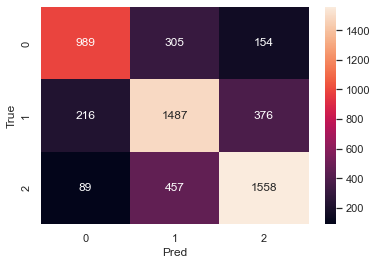

In [21]:
cm = confusion_matrix(Ytest, Ypred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()

# Random Forests

In [14]:
rf = RandomForestClassifier()
grid2 = {'n_estimators':[10, 50, 100],
        'max_depth':[5, 6, 7]}

bestRF = GridSearchCV(rf, grid2, cv = 5)
bestRF.fit(Xtrain_v, Ytrain)
bestRF.best_estimator_

RandomForestClassifier(max_depth=7)

In [15]:
Ypred = bestRF.predict(Xtest_v)
accuracy_score(Ytest, Ypred)  

0.49049902326407385

With Random forests we get very poor accuracy